In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


<ipython-input-23-da660f0f42e3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


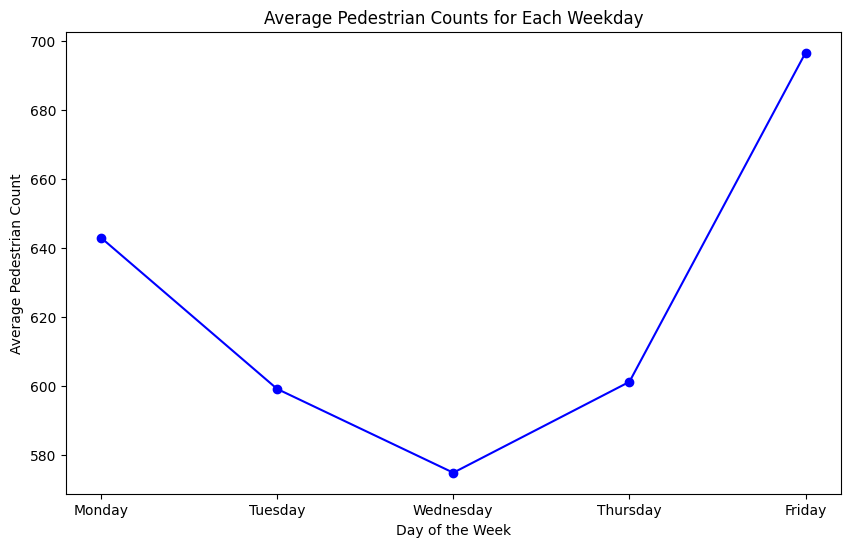

In [23]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['Day_of_Week'] = df['hour_beginning'].dt.dayofweek
weekday_df = df[df['Day_of_Week'] < 5]
weekday_counts = weekday_df.groupby('Day_of_Week')['Pedestrians'].mean()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.figure(figsize=(10, 6))
plt.plot(days, weekday_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.title('Average Pedestrian Counts for Each Weekday')
plt.show()


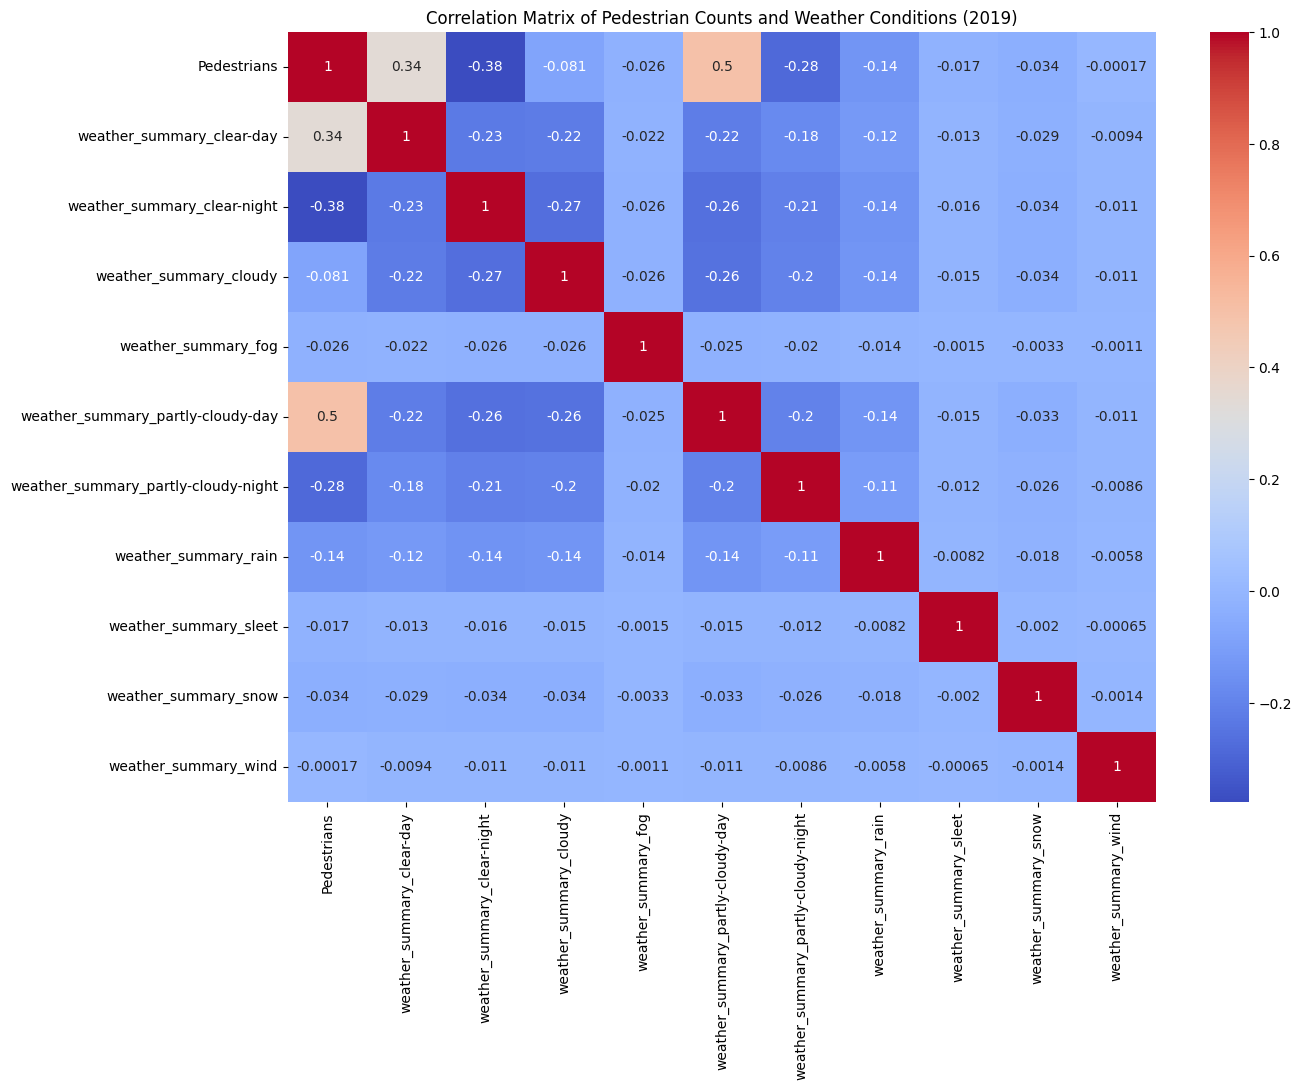

In [56]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019 = df_2019[['Pedestrians', 'weather_summary']]
df_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pedestrian Counts and Weather Conditions (2019)')
plt.show()


<ipython-input-59-e6e4cf7fe639>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pedestrian_activity, x='Time of Day', y='Pedestrians', palette='deep')


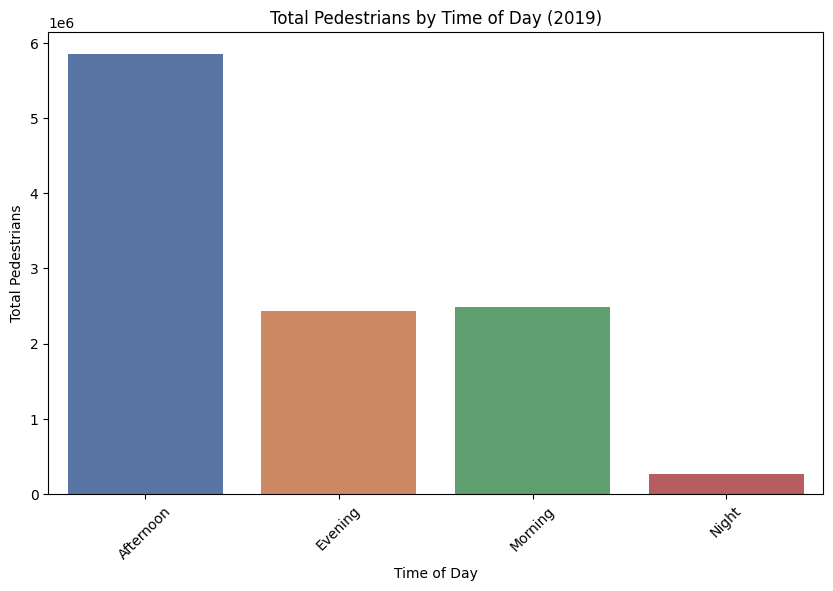

In [59]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
def categorize_time_of_day(hour):
    if 5 <= hour.hour < 12:
        return 'Morning'
    elif 12 <= hour.hour < 17:
        return 'Afternoon'
    elif 17 <= hour.hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['Time of Day'] = df['hour_beginning'].apply(categorize_time_of_day)
pedestrian_activity = df.groupby('Time of Day')['Pedestrians'].sum().reset_index()

# Plotting pedestrian activity throughout the day
plt.figure(figsize=(10, 6))
sns.barplot(data=pedestrian_activity, x='Time of Day', y='Pedestrians', palette='deep')
plt.title('Total Pedestrians by Time of Day (2019)')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrians')
plt.xticks(rotation=45)
plt.show()
